# CS:GO Match Data - Data Preparation and Exploratory Data Analysis

## Table of Contents
1. [Data Sources and Collection](#data-sources)
2. [Raw Data Overview](#raw-data)
3. [Data Cleaning Process](#cleaning)
4. [Exploratory Data Analysis](#eda)
5. [Feature Engineering](#features)
6. [Final Dataset](#final)

---

## Data Sources and Collection {#data-sources}

### Data Collection Method
The data was collected from Counter-Strike 2 (CS2) professional match demos using the **demoparser2** Python library. This library allows us to parse CS2 demo files (.dem) and extract detailed game statistics.

### Raw Data Sources
- **Demo Files**: Professional CS2 matches from HLTV.org
- **Match IDs**: 
  - 2385025_99903 (semperfi vs underground)
  - 2385383_99901 (aether vs full-send)
  - 2385385_99900 (incontrol vs nocturnal)

### Data Extraction Process
The demo files were processed using a custom Python script (`parse_demo_demoparser2.py`) that extracts:
1. **Deaths data**: Player kills, weapons, positions, damage
2. **Bomb events**: Plant/defuse events with locations
3. **Round data**: Round outcomes, win conditions, map information

### Links to Raw Data
- [Raw Demo Files](../demos_extracted/) - Original .dem files
- [Parsed CSV Data](../hltv_data/) - Extracted CSV files
- [Parsing Script](../parse_demo_demoparser2.py) - Data extraction code


In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.3.3
Matplotlib version: 3.10.6
Seaborn version: 0.13.2


## Raw Data Overview {#raw-data}

Let's start by loading and examining our raw data files. We have three types of data:
1. **Deaths**: Kill events with detailed information
2. **Bomb Events**: Bomb plant/defuse events
3. **Rounds**: Round-level outcomes and metadata


In [63]:
# Load all CSV files from the hltv_data directory
data_dir = Path('./hltv_data')

# Get all CSV files
death_files = list(data_dir.glob('*_deaths.csv'))
bomb_files = list(data_dir.glob('*_bomb_events.csv'))
round_files = list(data_dir.glob('*_rounds.csv'))

print(f"Found {len(death_files)} death files")
print(f"Found {len(bomb_files)} bomb event files")
print(f"Found {len(round_files)} round files")

# Display file names
print("\nDeath files:")
for f in death_files:
    print(f"  - {f.name}")
    
print("\nBomb event files:")
for f in bomb_files:
    print(f"  - {f.name}")
    
print("\nRound files:")
for f in round_files:
    print(f"  - {f.name}")


Found 8 death files
Found 8 bomb event files
Found 8 round files

Death files:
  - aether-vs-full-send-m1-mirage_deaths.csv
  - incontrol-vs-nocturnal-m1-mirage_deaths.csv
  - semperfi-vs-underground-m1-nuke_deaths.csv
  - incontrol-vs-nocturnal-m2-train_deaths.csv
  - incontrol-vs-nocturnal-m3-nuke_deaths.csv
  - semperfi-vs-underground-m2-mirage_deaths.csv
  - aether-vs-full-send-m3-train_deaths.csv
  - aether-vs-full-send-m2-inferno_deaths.csv

Bomb event files:
  - aether-vs-full-send-m3-train_bomb_events.csv
  - incontrol-vs-nocturnal-m1-mirage_bomb_events.csv
  - aether-vs-full-send-m2-inferno_bomb_events.csv
  - semperfi-vs-underground-m2-mirage_bomb_events.csv
  - semperfi-vs-underground-m1-nuke_bomb_events.csv
  - aether-vs-full-send-m1-mirage_bomb_events.csv
  - incontrol-vs-nocturnal-m3-nuke_bomb_events.csv
  - incontrol-vs-nocturnal-m2-train_bomb_events.csv

Round files:
  - incontrol-vs-nocturnal-m3-nuke_rounds.csv
  - incontrol-vs-nocturnal-m2-train_rounds.csv
  - semperf

In [64]:
# Load and combine all death data
deaths_data = []
for file in death_files:
    df = pd.read_csv(file)
    # Extract match info from filename
    match_name = file.stem.replace('_deaths', '')
    df['match_id'] = match_name
    deaths_data.append(df)

deaths_df = pd.concat(deaths_data, ignore_index=True)

print("=== RAW DEATHS DATA SAMPLE ===")
print(f"Shape: {deaths_df.shape}")
print("\nColumns:", list(deaths_df.columns))
print("\nFirst few rows:")
print(deaths_df.head())

print("\nData types:")
print(deaths_df.dtypes)


=== RAW DEATHS DATA SAMPLE ===
Shape: (1242, 27)

Columns: ['assistedflash', 'assister_name', 'assister_steamid', 'attacker_name', 'attacker_steamid', 'attackerblind', 'attackerinair', 'distance', 'dmg_armor', 'dmg_health', 'dominated', 'headshot', 'hitgroup', 'noreplay', 'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick', 'user_name', 'user_steamid', 'weapon', 'weapon_fauxitemid', 'weapon_itemid', 'weapon_originalowner_xuid', 'wipe', 'match_id']

First few rows:
   assistedflash assister_name  assister_steamid attacker_name  \
0          False           NaN               NaN    Majesticzz   
1          False       4TAYLOR      7.656120e+16         a_m_c   
2          False          juna      7.656120e+16       sathsea   
3          False       4TAYLOR      7.656120e+16         micro   
4          False           NaN               NaN     wasteyute   

   attacker_steamid  attackerblind  attackerinair  distance  dmg_armor  \
0      7.656120e+16          False          False  1.009

In [65]:
# Load and combine all bomb event data
bomb_data = []
for file in bomb_files:
    df = pd.read_csv(file)
    match_name = file.stem.replace('_bomb_events', '')
    df['match_id'] = match_name
    bomb_data.append(df)

bomb_df = pd.concat(bomb_data, ignore_index=True)

print("=== RAW BOMB EVENTS DATA SAMPLE ===")
print(f"Shape: {bomb_df.shape}")
print("\nColumns:", list(bomb_df.columns))
print("\nFirst few rows:")
print(bomb_df.head())

print("\nEvent types:")
print(bomb_df['event_type'].value_counts())


=== RAW BOMB EVENTS DATA SAMPLE ===
Shape: (107, 6)

Columns: ['site', 'tick', 'user_name', 'user_steamid', 'event_type', 'match_id']

First few rows:
   site   tick   user_name       user_steamid event_type  \
0   988  30208    CULIACAN  76561198166020071    planted   
1   743  51122       a_m_c  76561198804371130    planted   
2   743  57851  Majesticzz  76561198144801954    planted   
3   743  68407     spamzzy  76561198003724030    planted   
4   743  94776       micro  76561198072040762    planted   

                       match_id  
0  aether-vs-full-send-m3-train  
1  aether-vs-full-send-m3-train  
2  aether-vs-full-send-m3-train  
3  aether-vs-full-send-m3-train  
4  aether-vs-full-send-m3-train  

Event types:
event_type
planted     76
defused     19
exploded    12
Name: count, dtype: int64


In [66]:
# Load and combine all round data
round_data = []
for file in round_files:
    df = pd.read_csv(file)
    match_name = file.stem.replace('_rounds', '')
    df['match_id'] = match_name
    round_data.append(df)

rounds_df = pd.concat(round_data, ignore_index=True)

print("=== RAW ROUNDS DATA SAMPLE ===")
print(f"Shape: {rounds_df.shape}")
print("\nColumns:", list(rounds_df.columns))
print("\nFirst few rows:")
print(rounds_df.head())

print("\nRound end reasons:")
print(rounds_df['round_end_reason'].value_counts())

print("\nWinning teams:")
print(rounds_df['winning_team'].value_counts())

print("\nMaps:")
print(rounds_df['map_name'].value_counts())


=== RAW ROUNDS DATA SAMPLE ===
Shape: (175, 8)

Columns: ['round_num', 'winning_team', 'round_end_reason', 'bomb_planted', 'demo_type', 'map_name', 'parsing_status', 'match_id']

First few rows:
   round_num winning_team round_end_reason  bomb_planted demo_type map_name  \
0          2           CT         t_killed          True       cs2  de_nuke   
1          3           CT         t_killed          True       cs2  de_nuke   
2          4            T        ct_killed          True       cs2  de_nuke   
3          5           CT     bomb_defused          True       cs2  de_nuke   
4          6            T    bomb_exploded          True       cs2  de_nuke   

  parsing_status                        match_id  
0        success  incontrol-vs-nocturnal-m3-nuke  
1        success  incontrol-vs-nocturnal-m3-nuke  
2        success  incontrol-vs-nocturnal-m3-nuke  
3        success  incontrol-vs-nocturnal-m3-nuke  
4        success  incontrol-vs-nocturnal-m3-nuke  

Round end reasons:
roun

### Raw Data Quality Assessment

Let's examine the quality of our raw data by checking for missing values, data types, and potential issues.


In [67]:
# Data Quality Assessment Function
def assess_data_quality(df, dataset_name):
    print(f"=== {dataset_name.upper()} DATA QUALITY ASSESSMENT ===")
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Missing values
    missing_vals = df.isnull().sum()
    missing_pct = (missing_vals / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_vals,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Count', ascending=False)
    
    print(f"\nMissing Values:")
    print(missing_df[missing_df['Missing_Count'] > 0])
    
    # Data types
    print(f"\nData Types:")
    print(df.dtypes.value_counts())
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    return missing_df

# Assess each dataset
deaths_quality = assess_data_quality(deaths_df, "Deaths")
print("\n" + "="*60 + "\n")
bomb_quality = assess_data_quality(bomb_df, "Bomb Events")
print("\n" + "="*60 + "\n")
rounds_quality = assess_data_quality(rounds_df, "Rounds")


=== DEATHS DATA QUALITY ASSESSMENT ===
Shape: (1242, 27)
Memory usage: 0.61 MB

Missing Values:
                           Missing_Count  Missing_Percentage
weapon_originalowner_xuid           1242          100.000000
assister_steamid                     883           71.095008
assister_name                        883           71.095008
weapon_itemid                         67            5.394525
attacker_name                         11            0.885668
attacker_steamid                      11            0.885668

Data Types:
int64      8
bool       7
object     7
float64    5
Name: count, dtype: int64

Duplicate rows: 0 (0.00%)


=== BOMB EVENTS DATA QUALITY ASSESSMENT ===
Shape: (107, 6)
Memory usage: 0.02 MB

Missing Values:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Data Types:
int64     3
object    3
Name: count, dtype: int64

Duplicate rows: 0 (0.00%)


=== ROUNDS DATA QUALITY ASSESSMENT ===
Shape: (175, 8)
Memory usage: 0.06 MB

Missing Values:
 

## Data Cleaning Process {#cleaning}

Based on our quality assessment, we need to address several issues:
1. **Missing values** in various columns
2. **Data type inconsistencies**
3. **Potential outliers** in numerical columns
4. **Standardization** of categorical variables


In [68]:
# Create copies for cleaning
deaths_clean = deaths_df.copy()
bomb_clean = bomb_df.copy()
rounds_clean = rounds_df.copy()

print("=== CLEANING DEATHS DATA ===")

# 1. Handle missing values in deaths data
print("Before cleaning - Missing values:")
print(deaths_clean.isnull().sum().sort_values(ascending=False).head())

# Fill missing assister information (common in CS:GO - not all kills have assists)
deaths_clean['assister_name'].fillna('No Assist', inplace=True)
deaths_clean['assister_steamid'].fillna(0, inplace=True)

# Convert boolean columns
bool_columns = ['assistedflash', 'attackerblind', 'attackerinair', 'headshot', 'noreplay', 'noscope', 'thrusmoke']
for col in bool_columns:
    if col in deaths_clean.columns:
        deaths_clean[col] = deaths_clean[col].astype(bool)

# Convert numerical columns
numeric_columns = ['distance', 'dmg_armor', 'dmg_health', 'dominated', 'penetrated', 'revenge', 'wipe']
for col in numeric_columns:
    if col in deaths_clean.columns:
        deaths_clean[col] = pd.to_numeric(deaths_clean[col], errors='coerce')

print("\nAfter cleaning - Missing values:")
print(deaths_clean.isnull().sum().sort_values(ascending=False).head())


=== CLEANING DEATHS DATA ===
Before cleaning - Missing values:
weapon_originalowner_xuid    1242
assister_steamid              883
assister_name                 883
weapon_itemid                  67
attacker_name                  11
dtype: int64

After cleaning - Missing values:
weapon_originalowner_xuid    1242
weapon_itemid                  67
attacker_name                  11
attacker_steamid               11
assistedflash                   0
dtype: int64


In [69]:
# Clean weapon names - standardize weapon categories
def categorize_weapon(weapon_name):
    """Categorize weapons into main types"""
    if pd.isna(weapon_name):
        return 'Unknown'
    
    weapon = str(weapon_name).lower()
    
    if 'knife' in weapon or 'bayonet' in weapon or 'karambit' in weapon:
        return 'Knife'
    elif 'ak47' in weapon or 'ak_47' in weapon:
        return 'AK-47'
    elif 'm4a4' in weapon or 'm4a1' in weapon:
        return 'M4'
    elif 'awp' in weapon:
        return 'AWP'
    elif 'glock' in weapon or 'usp' in weapon or 'hkp2000' in weapon or 'p250' in weapon or 'deagle' in weapon or 'elite' in weapon:
        return 'Pistol'
    elif 'famas' in weapon or 'galil' in weapon:
        return 'Budget Rifle'
    elif 'mp' in weapon or 'ump' in weapon or 'p90' in weapon or 'bizon' in weapon:
        return 'SMG'
    elif 'nova' in weapon or 'xm1014' in weapon or 'mag7' in weapon or 'sawed' in weapon:
        return 'Shotgun'
    elif 'ssg08' in weapon or 'scar20' in weapon or 'g3sg1' in weapon:
        return 'Sniper'
    elif 'hegrenade' in weapon or 'flashbang' in weapon or 'smoke' in weapon or 'molotov' in weapon or 'incgrenade' in weapon:
        return 'Grenade'
    else:
        return 'Other'

# Apply weapon categorization
deaths_clean['weapon_category'] = deaths_clean['weapon'].apply(categorize_weapon)

print("Weapon categories:")
print(deaths_clean['weapon_category'].value_counts())

# Remove extreme outliers in distance (likely parsing errors)
Q1 = deaths_clean['distance'].quantile(0.25)
Q3 = deaths_clean['distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before = len(deaths_clean[(deaths_clean['distance'] < lower_bound) | (deaths_clean['distance'] > upper_bound)])
deaths_clean = deaths_clean[(deaths_clean['distance'] >= lower_bound) & (deaths_clean['distance'] <= upper_bound)]
outliers_removed = outliers_before - len(deaths_clean[(deaths_clean['distance'] < lower_bound) | (deaths_clean['distance'] > upper_bound)])

print(f"\nRemoved {outliers_removed} extreme distance outliers")


Weapon categories:
weapon_category
AK-47           387
M4              260
Pistol          188
Other           122
AWP             101
Budget Rifle     62
SMG              54
Knife            40
Sniper           14
Grenade          11
Shotgun           3
Name: count, dtype: int64

Removed 8 extreme distance outliers


In [70]:
print("=== CLEANING BOMB EVENTS DATA ===")

# Clean bomb events data
print("Before cleaning - Missing values:")
print(bomb_clean.isnull().sum().sort_values(ascending=False))

# No missing values to handle in bomb events, but let's standardize
bomb_clean['event_type'] = bomb_clean['event_type'].str.lower()

print("\nEvent types after standardization:")
print(bomb_clean['event_type'].value_counts())

print("\n=== CLEANING ROUNDS DATA ===")

# Clean rounds data
print("Before cleaning - Missing values:")
print(rounds_clean.isnull().sum().sort_values(ascending=False))

# Handle missing values in rounds data
rounds_clean = rounds_clean.dropna(subset=['winning_team', 'round_end_reason'])

# Standardize team names and round end reasons
rounds_clean['winning_team'] = rounds_clean['winning_team'].str.upper()
rounds_clean['round_end_reason'] = rounds_clean['round_end_reason'].str.lower()

print("\nRound end reasons after standardization:")
print(rounds_clean['round_end_reason'].value_counts())

print("\nWinning teams after standardization:")
print(rounds_clean['winning_team'].value_counts())


=== CLEANING BOMB EVENTS DATA ===
Before cleaning - Missing values:
site            0
tick            0
user_name       0
user_steamid    0
event_type      0
match_id        0
dtype: int64

Event types after standardization:
event_type
planted     76
defused     19
exploded    12
Name: count, dtype: int64

=== CLEANING ROUNDS DATA ===
Before cleaning - Missing values:
winning_team        4
round_end_reason    4
round_num           0
bomb_planted        0
demo_type           0
map_name            0
parsing_status      0
match_id            0
dtype: int64

Round end reasons after standardization:
round_end_reason
t_killed         75
ct_killed        62
bomb_defused     19
bomb_exploded    10
time_ran_out      5
Name: count, dtype: int64

Winning teams after standardization:
winning_team
CT    99
T     72
Name: count, dtype: int64


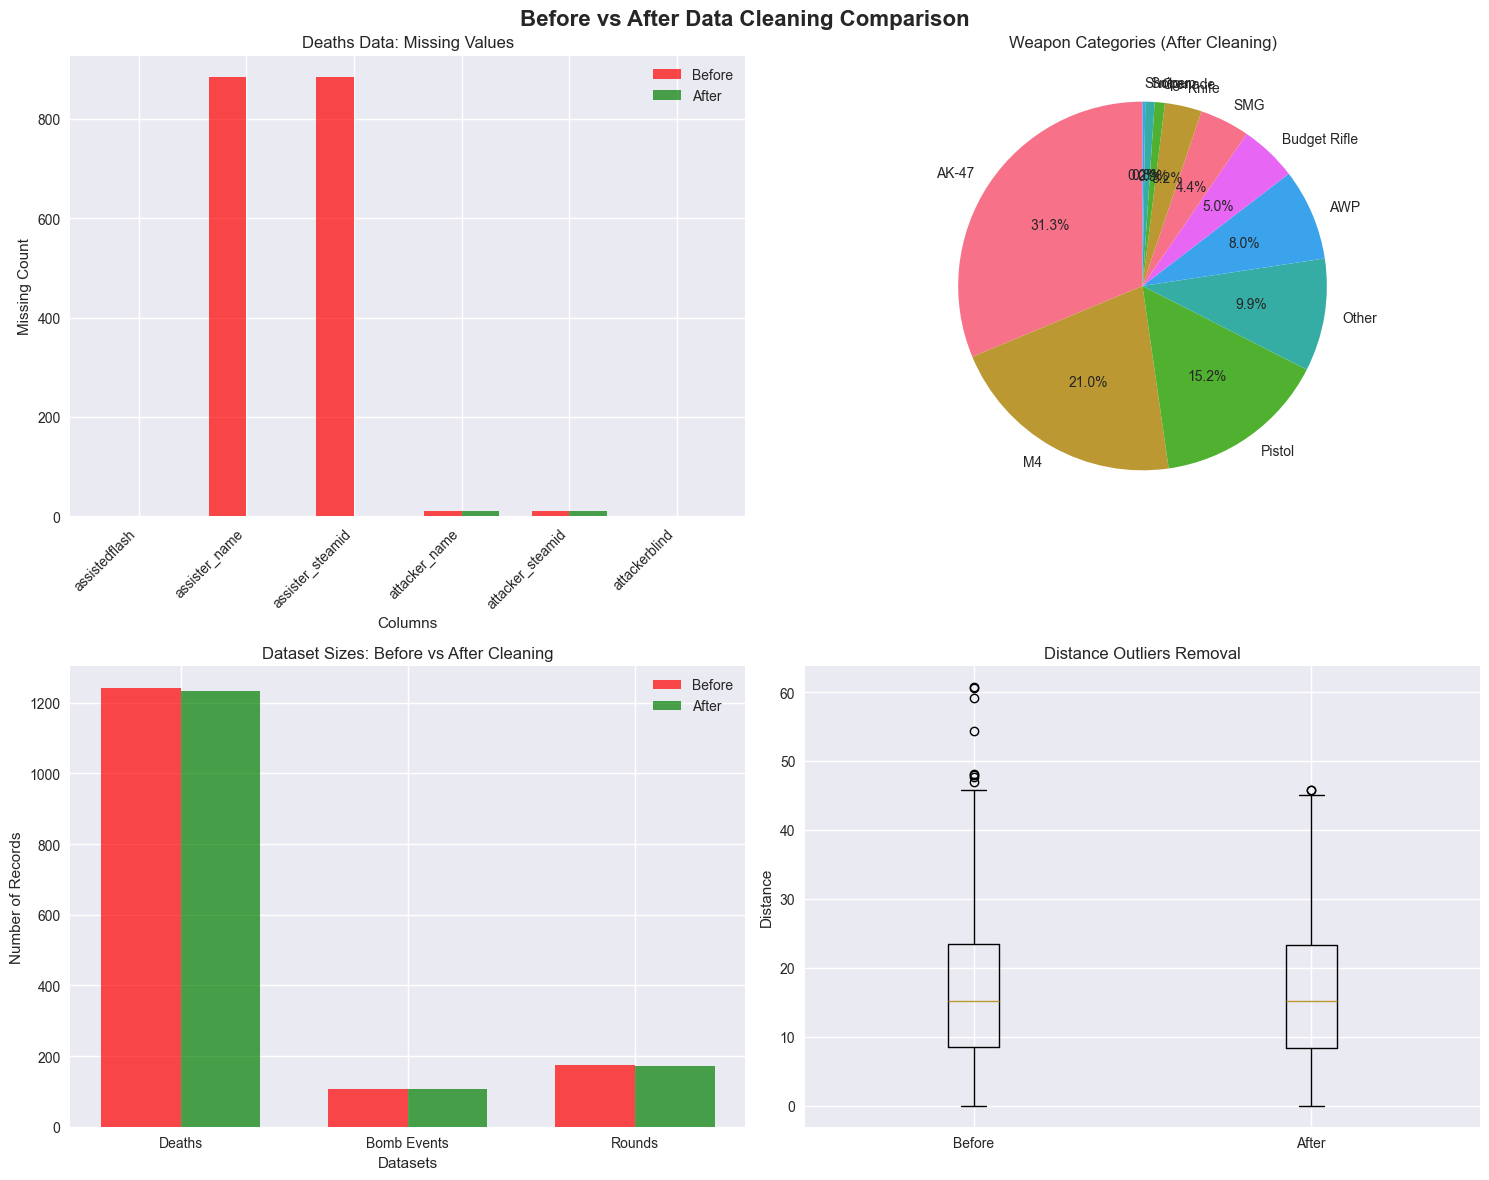

=== CLEANING SUMMARY ===
Deaths data: 1242 → 1234 records
Bomb events: 107 → 107 records
Rounds data: 175 → 171 records
Total missing values in deaths data: 3097 → 1323


In [71]:
# Before vs After Data Cleaning Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Before vs After Data Cleaning Comparison', fontsize=16, fontweight='bold')

# Deaths data - Missing values comparison
ax1 = axes[0, 0]
before_missing = deaths_df.isnull().sum().head(6)
after_missing = deaths_clean.isnull().sum().head(6)
x = range(len(before_missing))
width = 0.35

ax1.bar([i - width/2 for i in x], before_missing.values, width, label='Before', alpha=0.7, color='red')
ax1.bar([i + width/2 for i in x], after_missing.values, width, label='After', alpha=0.7, color='green')
ax1.set_title('Deaths Data: Missing Values')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Missing Count')
ax1.set_xticks(x)
ax1.set_xticklabels(before_missing.index, rotation=45, ha='right')
ax1.legend()

# Weapon categories - before vs after
ax2 = axes[0, 1]
original_weapons = deaths_df['weapon'].value_counts().head(10)
cleaned_categories = deaths_clean['weapon_category'].value_counts()

ax2.pie(cleaned_categories.values, labels=cleaned_categories.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Weapon Categories (After Cleaning)')

# Data shape comparison
ax3 = axes[1, 0]
datasets = ['Deaths', 'Bomb Events', 'Rounds']
before_shapes = [deaths_df.shape[0], bomb_df.shape[0], rounds_df.shape[0]]
after_shapes = [deaths_clean.shape[0], bomb_clean.shape[0], rounds_clean.shape[0]]

x = range(len(datasets))
ax3.bar([i - width/2 for i in x], before_shapes, width, label='Before', alpha=0.7, color='red')
ax3.bar([i + width/2 for i in x], after_shapes, width, label='After', alpha=0.7, color='green')
ax3.set_title('Dataset Sizes: Before vs After Cleaning')
ax3.set_xlabel('Datasets')
ax3.set_ylabel('Number of Records')
ax3.set_xticks(x)
ax3.set_xticklabels(datasets)
ax3.legend()

# Distance outliers removal visualization
ax4 = axes[1, 1]
ax4.boxplot([deaths_df['distance'].dropna(), deaths_clean['distance'].dropna()], 
           labels=['Before', 'After'])
ax4.set_title('Distance Outliers Removal')
ax4.set_ylabel('Distance')

plt.tight_layout()
plt.show()

print("=== CLEANING SUMMARY ===")
print(f"Deaths data: {deaths_df.shape[0]} → {deaths_clean.shape[0]} records")
print(f"Bomb events: {bomb_df.shape[0]} → {bomb_clean.shape[0]} records") 
print(f"Rounds data: {rounds_df.shape[0]} → {rounds_clean.shape[0]} records")
print(f"Total missing values in deaths data: {deaths_df.isnull().sum().sum()} → {deaths_clean.isnull().sum().sum()}")


## Exploratory Data Analysis {#eda}

Now that our data is clean, let's dive deep into understanding the patterns and insights within our CS:GO match data. We'll create comprehensive visualizations to explore various aspects of the gameplay data.

### Data Overview Summary

Our cleaned dataset consists of:
- **Deaths Data**: Individual kill events with weapon information, damage dealt, and contextual details
- **Bomb Events**: Bomb plant, defuse, and explosion events with timing and location
- **Rounds Data**: Round-level outcomes, win conditions, and match metadata

Let's explore these datasets through multiple visualization techniques to uncover meaningful patterns.


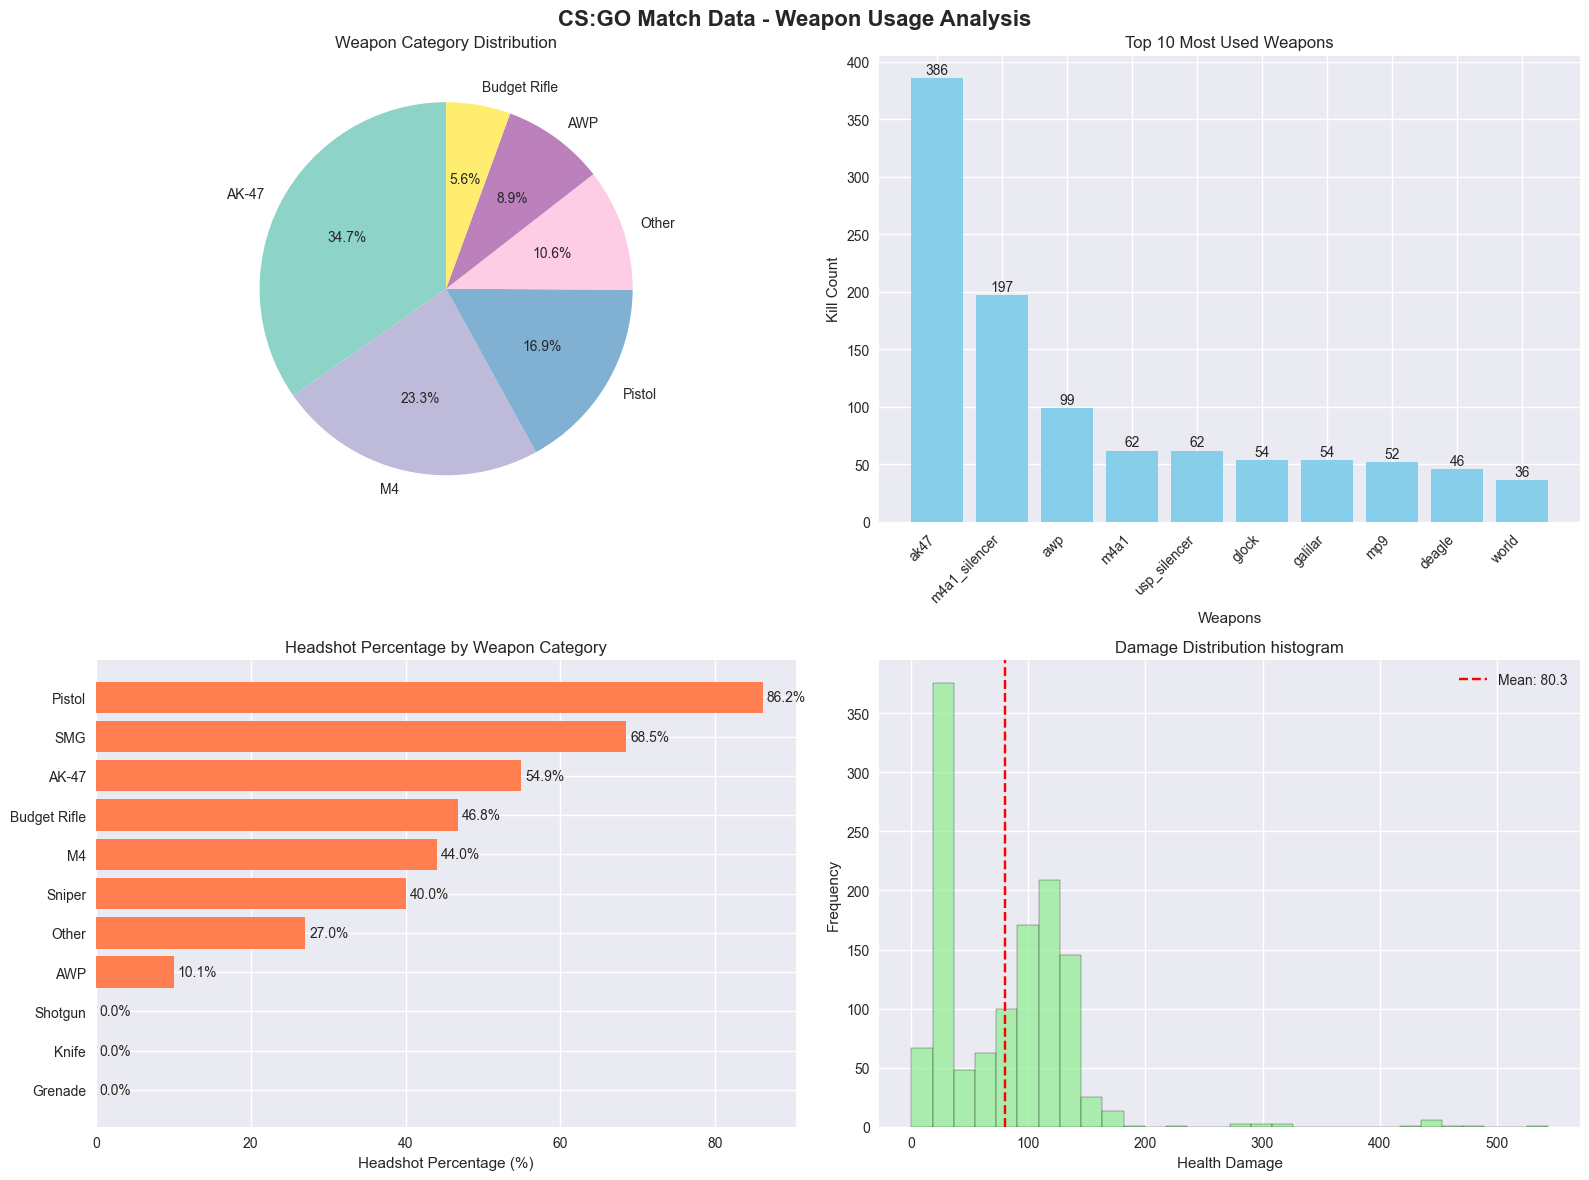

\n=== WEAPON ANALYSIS INSIGHTS ===
Most used weapon category: AK-47 (386 kills)
Highest headshot rate: Pistol (86.2%)
Average damage per kill: 80.3 HP


In [81]:
# EDA Visualization 1: Weapon Usage Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CS:GO Match Data - Weapon Usage Analysis', fontsize=16, fontweight='bold')

# Weapon categories pie chart
ax1 = axes[0, 0]
weapon_counts = deaths_clean['weapon_category'].value_counts()

# Combine small slices (less than 5%) into "Other" category
threshold = 0.05
main_weapons = weapon_counts[weapon_counts / weapon_counts.sum() >= threshold]
other_count = weapon_counts[weapon_counts / weapon_counts.sum() < threshold].sum()

if other_count > 0:
    main_weapons = main_weapons.copy()
    main_weapons['Other'] = other_count

colors = plt.cm.Set3(np.linspace(0, 1, len(main_weapons)))
wedges, texts, autotexts = ax1.pie(main_weapons.values, labels=main_weapons.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90,
                                  textprops={'fontsize': 10})
ax1.set_title('Weapon Category Distribution')

# Top 10 specific weapons
ax2 = axes[0, 1]
top_weapons = deaths_clean['weapon'].value_counts().head(10)
bars = ax2.bar(range(len(top_weapons)), top_weapons.values, color='skyblue')
ax2.set_title('Top 10 Most Used Weapons')
ax2.set_xlabel('Weapons')
ax2.set_ylabel('Kill Count')
ax2.set_xticks(range(len(top_weapons)))
ax2.set_xticklabels(top_weapons.index, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, top_weapons.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(value), ha='center', va='bottom')

# Headshot percentage by weapon category
ax3 = axes[1, 0]
headshot_by_weapon = deaths_clean.groupby('weapon_category')['headshot'].agg(['sum', 'count'])
headshot_by_weapon['percentage'] = (headshot_by_weapon['sum'] / headshot_by_weapon['count']) * 100
headshot_sorted = headshot_by_weapon.sort_values('percentage', ascending=True)

bars = ax3.barh(range(len(headshot_sorted)), headshot_sorted['percentage'], color='coral')
ax3.set_title('Headshot Percentage by Weapon Category')
ax3.set_xlabel('Headshot Percentage (%)')
ax3.set_yticks(range(len(headshot_sorted)))
ax3.set_yticklabels(headshot_sorted.index)

# Add percentage labels
for i, (bar, percentage) in enumerate(zip(bars, headshot_sorted['percentage'])):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{percentage:.1f}%', ha='left', va='center')

# Damage distribution
ax4 = axes[1, 1]
ax4.hist(deaths_clean['dmg_health'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax4.set_title('Damage Distribution histogram')
ax4.set_xlabel('Health Damage')
ax4.set_ylabel('Frequency')
ax4.axvline(deaths_clean['dmg_health'].mean(), color='red', linestyle='--', 
           label=f'Mean: {deaths_clean["dmg_health"].mean():.1f}')
ax4.legend()

plt.tight_layout()
plt.show()

print("\\n=== WEAPON ANALYSIS INSIGHTS ===")
print(f"Most used weapon category: {weapon_counts.index[0]} ({weapon_counts.iloc[0]} kills)")
print(f"Highest headshot rate: {headshot_sorted.index[-1]} ({headshot_sorted['percentage'].iloc[-1]:.1f}%)")
print(f"Average damage per kill: {deaths_clean['dmg_health'].mean():.1f} HP")


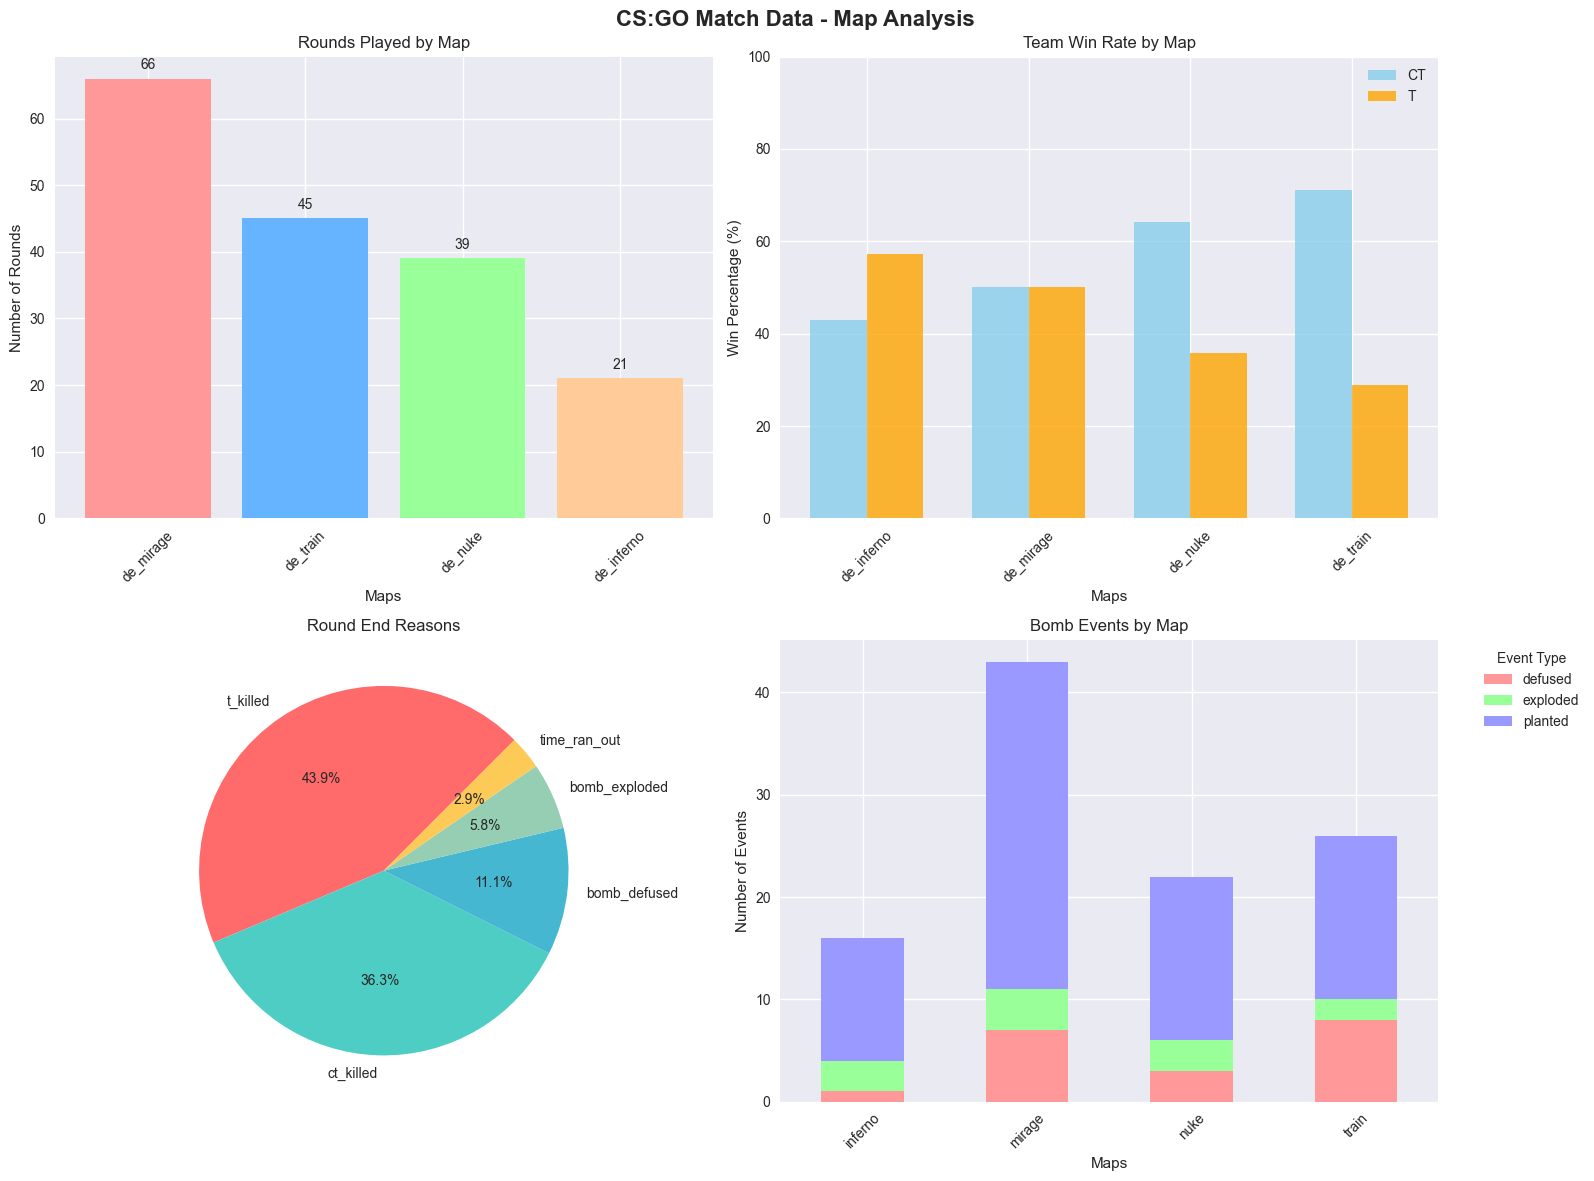

\n=== MAP ANALYSIS INSIGHTS ===
Most played map: de_mirage (66 rounds)
Most common round end: t_killed (75 times)
Total bomb plants: 76
Defuse success rate: 25.0%


In [73]:
# EDA Visualization 2: Map Performance Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CS:GO Match Data - Map Analysis', fontsize=16, fontweight='bold')

# Rounds per map
ax1 = axes[0, 0]
map_counts = rounds_clean['map_name'].value_counts()
bars = ax1.bar(map_counts.index, map_counts.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
ax1.set_title('Rounds Played by Map')
ax1.set_xlabel('Maps')
ax1.set_ylabel('Number of Rounds')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for bar, value in zip(bars, map_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(value), ha='center', va='bottom')

# Win rate by team across maps
ax2 = axes[0, 1]
team_wins = rounds_clean.groupby(['map_name', 'winning_team']).size().unstack(fill_value=0)
team_wins_pct = team_wins.div(team_wins.sum(axis=1), axis=0) * 100

x = np.arange(len(team_wins_pct.index))
width = 0.35

bars1 = ax2.bar(x - width/2, team_wins_pct['CT'], width, label='CT', color='skyblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, team_wins_pct['T'], width, label='T', color='orange', alpha=0.8)

ax2.set_title('Team Win Rate by Map')
ax2.set_xlabel('Maps')
ax2.set_ylabel('Win Percentage (%)')
ax2.set_xticks(x)
ax2.set_xticklabels(team_wins_pct.index, rotation=45)
ax2.legend()
ax2.set_ylim(0, 100)

# Round end reasons distribution
ax3 = axes[1, 0]
round_end_counts = rounds_clean['round_end_reason'].value_counts()
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57']
wedges, texts, autotexts = ax3.pie(round_end_counts.values, labels=round_end_counts.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=45)
ax3.set_title('Round End Reasons')

# Bomb events by map
ax4 = axes[1, 1]
bomb_by_map = bomb_clean.groupby(['match_id', 'event_type']).size().reset_index(name='count')
# Extract map name from match_id - fix regex pattern
bomb_by_map['map'] = bomb_by_map['match_id'].str.extract(r'-m\d+-(\w+)$')[0]
# Fill any NaN values with 'unknown'
bomb_by_map['map'] = bomb_by_map['map'].fillna('unknown')

bomb_summary = bomb_by_map.groupby(['map', 'event_type'])['count'].sum().unstack(fill_value=0)

# Ensure we have numeric data and proper column types
if not bomb_summary.empty and bomb_summary.select_dtypes(include=[np.number]).shape[1] > 0:
    # Get available colors for the number of event types
    available_colors = ['#ff9999', '#99ff99', '#9999ff', '#ffcc99', '#cc99ff']
    colors_to_use = available_colors[:len(bomb_summary.columns)]
    
    bomb_summary.plot(kind='bar', stacked=True, ax=ax4, color=colors_to_use)
    ax4.set_title('Bomb Events by Map')
    ax4.set_xlabel('Maps')
    ax4.set_ylabel('Number of Events')
    ax4.tick_params(axis='x', rotation=45)
    ax4.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    # Fallback: create a simple bar chart if unstacking fails
    bomb_counts = bomb_clean['event_type'].value_counts()
    ax4.bar(bomb_counts.index, bomb_counts.values, color=['#ff9999', '#99ff99', '#9999ff'])
    ax4.set_title('Bomb Events Distribution')
    ax4.set_xlabel('Event Type')
    ax4.set_ylabel('Number of Events')
    ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\\n=== MAP ANALYSIS INSIGHTS ===")
print(f"Most played map: {map_counts.index[0]} ({map_counts.iloc[0]} rounds)")
print(f"Most common round end: {round_end_counts.index[0]} ({round_end_counts.iloc[0]} times)")
print(f"Total bomb plants: {bomb_clean[bomb_clean['event_type'] == 'planted'].shape[0]}")
print(f"Defuse success rate: {(bomb_clean[bomb_clean['event_type'] == 'defused'].shape[0] / bomb_clean[bomb_clean['event_type'] == 'planted'].shape[0] * 100):.1f}%")


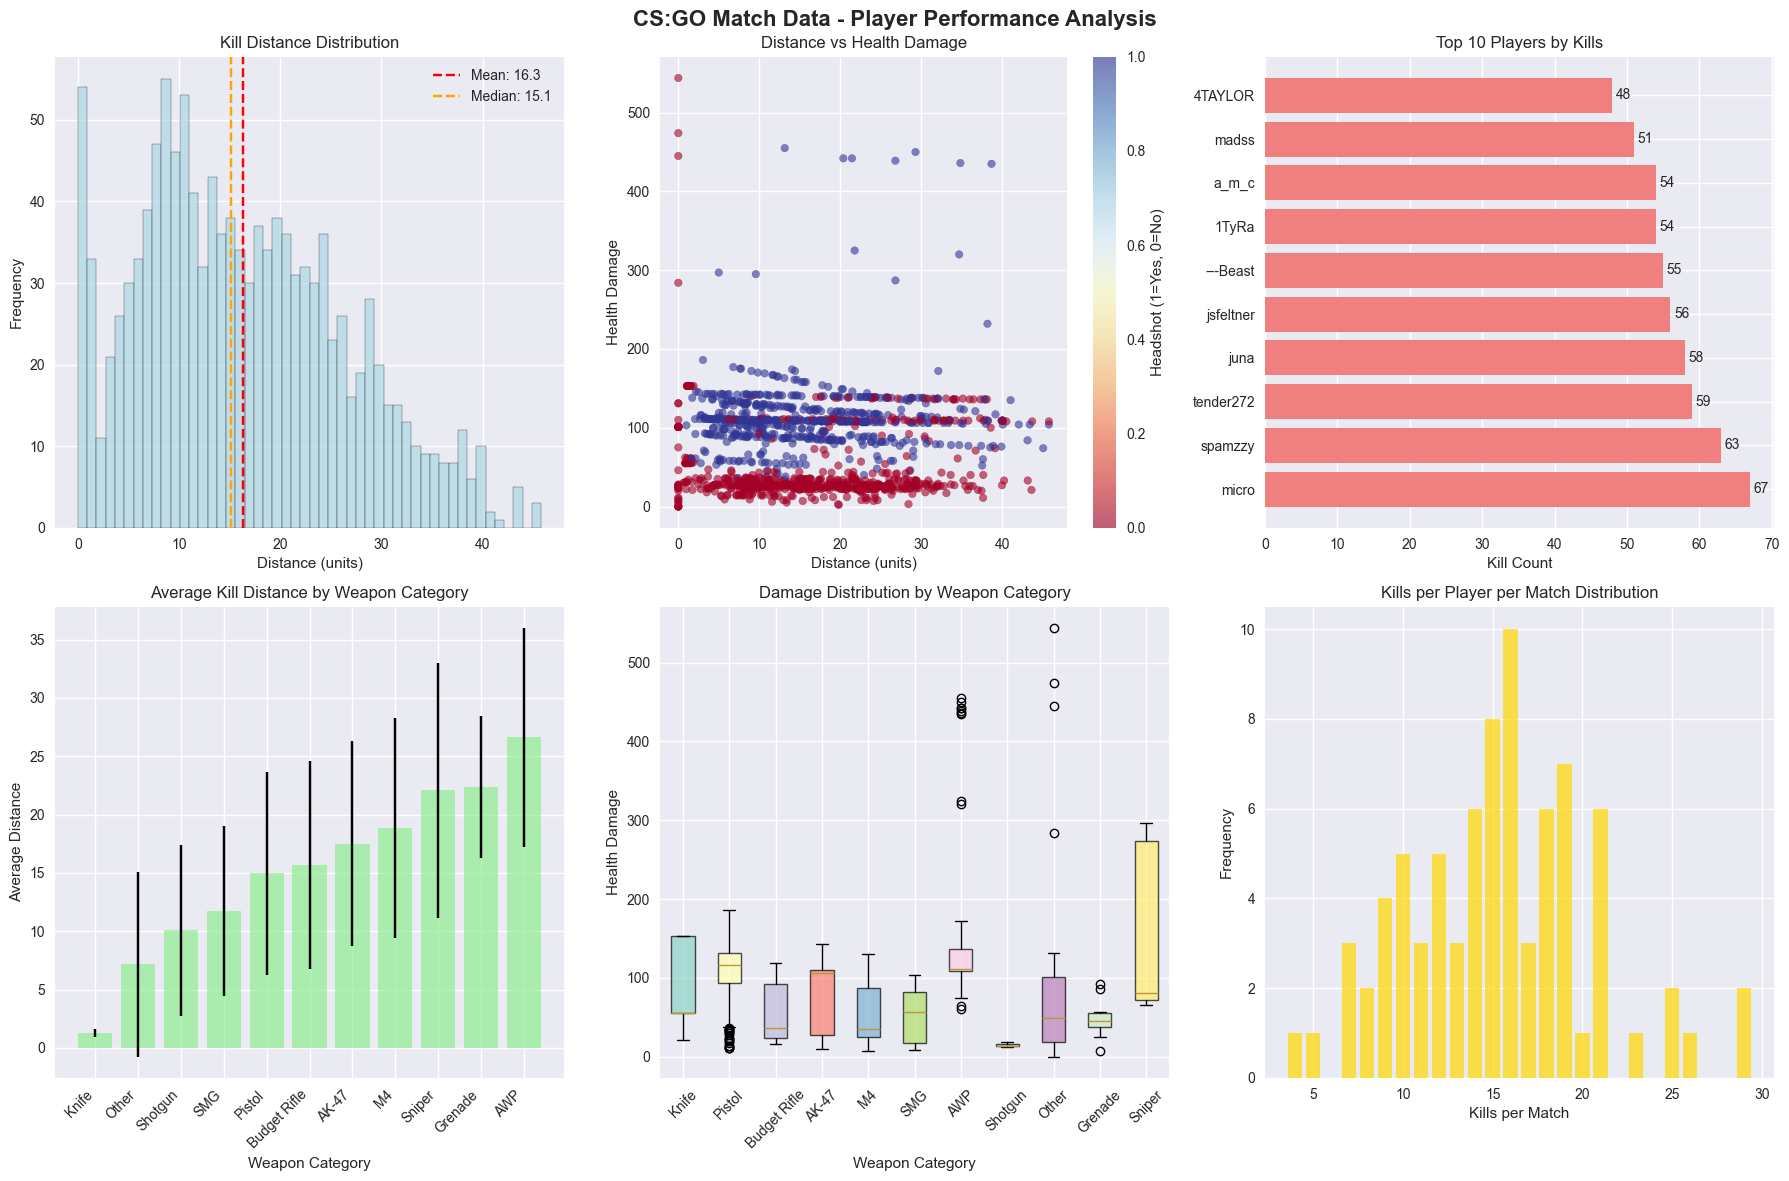

\n=== PLAYER PERFORMANCE INSIGHTS ===
Average kill distance: 16.3 units
Most effective long-range weapon: AWP (avg: 26.6 units)
Most effective close-range weapon: Knife (avg: 1.3 units)
Top killer: micro with 67 kills
Headshot rate overall: 48.7%


In [82]:
# EDA Visualization 3: Player Performance and Distance Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('CS:GO Match Data - Player Performance Analysis', fontsize=16, fontweight='bold')

# Distance distribution for kills
ax1 = axes[0, 0]
ax1.hist(deaths_clean['distance'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_title('Kill Distance Distribution')
ax1.set_xlabel('Distance (units)')
ax1.set_ylabel('Frequency')
ax1.axvline(deaths_clean['distance'].mean(), color='red', linestyle='--', 
           label=f'Mean: {deaths_clean["distance"].mean():.1f}')
ax1.axvline(deaths_clean['distance'].median(), color='orange', linestyle='--', 
           label=f'Median: {deaths_clean["distance"].median():.1f}')
ax1.legend()

# Distance vs Damage correlation
ax2 = axes[0, 1]
scatter = ax2.scatter(deaths_clean['distance'], deaths_clean['dmg_health'], 
                     alpha=0.6, c=deaths_clean['headshot'].astype(int), 
                     cmap='RdYlBu', s=30)
ax2.set_title('Distance vs Health Damage')
ax2.set_xlabel('Distance (units)')
ax2.set_ylabel('Health Damage')
plt.colorbar(scatter, ax=ax2, label='Headshot (1=Yes, 0=No)')

# Top killers analysis
ax3 = axes[0, 2]
top_killers = deaths_clean['attacker_name'].value_counts().head(10)
bars = ax3.barh(range(len(top_killers)), top_killers.values, color='lightcoral')
ax3.set_title('Top 10 Players by Kills')
ax3.set_xlabel('Kill Count')
ax3.set_yticks(range(len(top_killers)))
ax3.set_yticklabels(top_killers.index)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_killers.values)):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             str(value), ha='left', va='center')

# Weapon effectiveness by distance
ax4 = axes[1, 0]
weapon_distance = deaths_clean.groupby('weapon_category')['distance'].agg(['mean', 'std']).reset_index()
weapon_distance = weapon_distance.sort_values('mean')

bars = ax4.bar(range(len(weapon_distance)), weapon_distance['mean'], 
              yerr=weapon_distance['std'], capsize=5, color='lightgreen', alpha=0.7)
ax4.set_title('Average Kill Distance by Weapon Category')
ax4.set_xlabel('Weapon Category')
ax4.set_ylabel('Average Distance')
ax4.set_xticks(range(len(weapon_distance)))
ax4.set_xticklabels(weapon_distance['weapon_category'], rotation=45, ha='right')

# Damage dealt distribution by weapon category
ax5 = axes[1, 1]
weapon_categories = deaths_clean['weapon_category'].unique()
damage_data = [deaths_clean[deaths_clean['weapon_category'] == cat]['dmg_health'].values 
               for cat in weapon_categories]

bp = ax5.boxplot(damage_data, labels=weapon_categories, patch_artist=True)
colors = plt.cm.Set3(np.linspace(0, 1, len(weapon_categories)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax5.set_title('Damage Distribution by Weapon Category')
ax5.set_xlabel('Weapon Category')
ax5.set_ylabel('Health Damage')
ax5.tick_params(axis='x', rotation=45)

# Kill streaks analysis (simplified)
ax6 = axes[1, 2]
# Count kills per player per round
kills_per_round = deaths_clean.groupby(['attacker_name', 'match_id']).size()
kill_distribution = kills_per_round.value_counts().sort_index()

bars = ax6.bar(kill_distribution.index, kill_distribution.values, color='gold', alpha=0.7)
ax6.set_title('Kills per Player per Match Distribution')
ax6.set_xlabel('Kills per Match')
ax6.set_ylabel('Frequency')

# # Add value labels
# for bar, value in zip(bars, kill_distribution.values):
#     if value > 0:  # Only show labels for non-zero values
#         ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
#                  str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\\n=== PLAYER PERFORMANCE INSIGHTS ===")
print(f"Average kill distance: {deaths_clean['distance'].mean():.1f} units")
print(f"Most effective long-range weapon: {weapon_distance.iloc[-1]['weapon_category']} (avg: {weapon_distance.iloc[-1]['mean']:.1f} units)")
print(f"Most effective close-range weapon: {weapon_distance.iloc[0]['weapon_category']} (avg: {weapon_distance.iloc[0]['mean']:.1f} units)")
print(f"Top killer: {top_killers.index[0]} with {top_killers.iloc[0]} kills")
print(f"Headshot rate overall: {(deaths_clean['headshot'].sum() / len(deaths_clean) * 100):.1f}%")


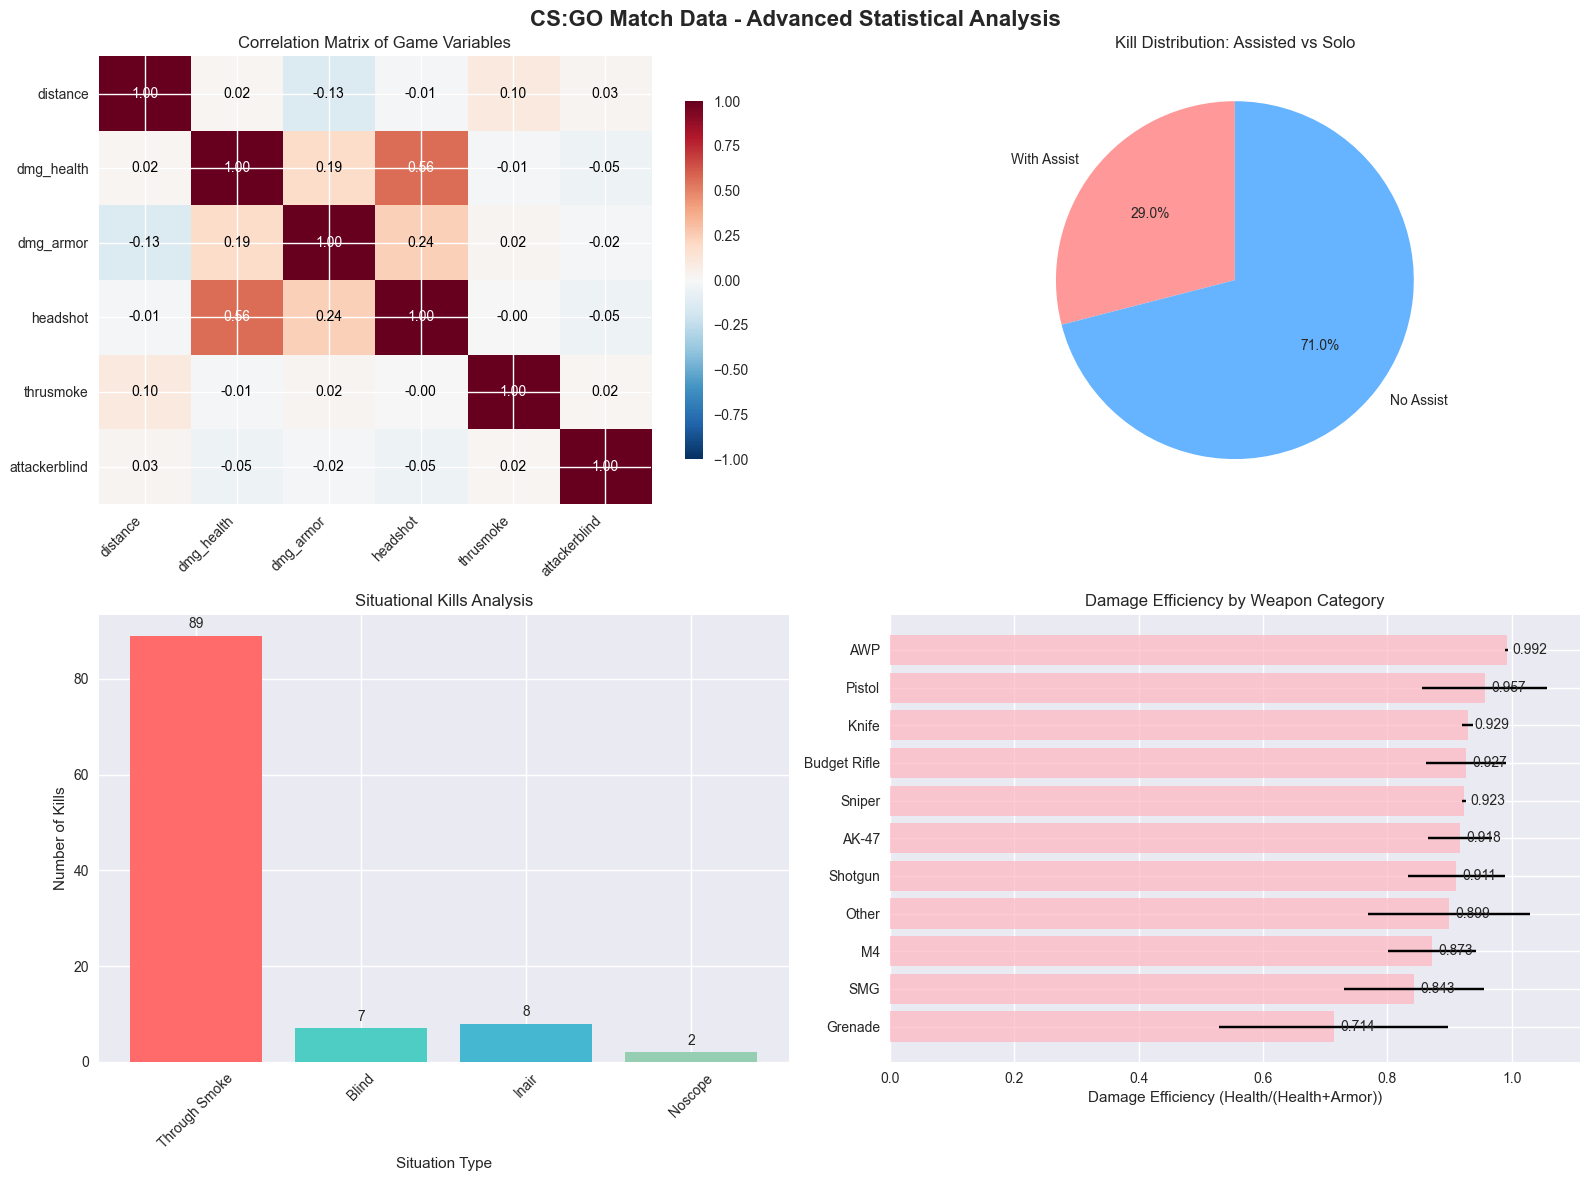

\n=== ADVANCED STATISTICAL INSIGHTS ===
Assist rate: 29.0%
Most common situational kill: Through Smoke (89 kills)
Strongest correlation: 1.000
Most efficient weapon category: AWP (0.992)


In [75]:
# EDA Visualization 4: Advanced Statistical Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CS:GO Match Data - Advanced Statistical Analysis', fontsize=16, fontweight='bold')

# Correlation heatmap of numerical variables
ax1 = axes[0, 0]
numerical_cols = ['distance', 'dmg_health', 'dmg_armor', 'headshot', 'thrusmoke', 'attackerblind']
correlation_matrix = deaths_clean[numerical_cols].corr()

im = ax1.imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax1.set_xticks(range(len(numerical_cols)))
ax1.set_yticks(range(len(numerical_cols)))
ax1.set_xticklabels(numerical_cols, rotation=45, ha='right')
ax1.set_yticklabels(numerical_cols)
ax1.set_title('Correlation Matrix of Game Variables')

# Add correlation values to heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        text = ax1.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black" if abs(correlation_matrix.iloc[i, j]) < 0.5 else "white")

plt.colorbar(im, ax=ax1, shrink=0.8)

# Assist analysis
ax2 = axes[0, 1]
assist_stats = deaths_clean['assister_name'].value_counts()
has_assist = (deaths_clean['assister_name'] != 'No Assist').sum()
no_assist = (deaths_clean['assister_name'] == 'No Assist').sum()

assist_pie_data = [has_assist, no_assist]
assist_labels = ['With Assist', 'No Assist']
colors = ['#ff9999', '#66b3ff']

wedges, texts, autotexts = ax2.pie(assist_pie_data, labels=assist_labels, autopct='%1.1f%%', 
                                  colors=colors, startangle=90)
ax2.set_title('Kill Distribution: Assisted vs Solo')

# Situational kills analysis
ax3 = axes[1, 0]
situational_cols = ['thrusmoke', 'attackerblind', 'attackerinair', 'noscope']
situational_data = []
situational_labels = []

for col in situational_cols:
    if col in deaths_clean.columns:
        count = deaths_clean[col].sum()
        situational_data.append(count)
        situational_labels.append(col.replace('attacker', '').replace('thru', 'through ').title())

bars = ax3.bar(situational_labels, situational_data, 
              color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'])
ax3.set_title('Situational Kills Analysis')
ax3.set_xlabel('Situation Type')
ax3.set_ylabel('Number of Kills')
ax3.tick_params(axis='x', rotation=45)

# Add value labels
for bar, value in zip(bars, situational_data):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(value), ha='center', va='bottom')

# Damage efficiency analysis
ax4 = axes[1, 1]
deaths_clean['damage_efficiency'] = deaths_clean['dmg_health'] / (deaths_clean['dmg_health'] + deaths_clean['dmg_armor'])
efficiency_by_weapon = deaths_clean.groupby('weapon_category')['damage_efficiency'].agg(['mean', 'std']).reset_index()
efficiency_by_weapon = efficiency_by_weapon.sort_values('mean', ascending=True)

bars = ax4.barh(range(len(efficiency_by_weapon)), efficiency_by_weapon['mean'],
               xerr=efficiency_by_weapon['std'], capsize=3, color='lightpink', alpha=0.7)
ax4.set_title('Damage Efficiency by Weapon Category')
ax4.set_xlabel('Damage Efficiency (Health/(Health+Armor))')
ax4.set_yticks(range(len(efficiency_by_weapon)))
ax4.set_yticklabels(efficiency_by_weapon['weapon_category'])

# Add value labels
for i, (bar, value) in enumerate(zip(bars, efficiency_by_weapon['mean'])):
    ax4.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

print("\\n=== ADVANCED STATISTICAL INSIGHTS ===")
print(f"Assist rate: {(has_assist / len(deaths_clean) * 100):.1f}%")
print(f"Most common situational kill: {situational_labels[np.argmax(situational_data)]} ({max(situational_data)} kills)")
print(f"Strongest correlation: {correlation_matrix.abs().unstack().sort_values(ascending=False).iloc[1]:.3f}")
print(f"Most efficient weapon category: {efficiency_by_weapon.iloc[-1]['weapon_category']} ({efficiency_by_weapon.iloc[-1]['mean']:.3f})")


## Feature Engineering {#features}

Now that we've thoroughly explored our data, let's create additional features that could be useful for machine learning models. We'll engineer features based on our EDA insights and domain knowledge of CS:GO gameplay.

### New Features to Create:
1. **Kill effectiveness metrics**: Combining damage, distance, and situational factors
2. **Player performance indicators**: Aggregated statistics per player
3. **Map-specific features**: Performance metrics per map
4. **Temporal features**: Time-based patterns in gameplay
5. **Team dynamics**: Assist patterns and team coordination metrics


In [76]:
# Feature Engineering - Creating new meaningful features
print("=== FEATURE ENGINEERING ===")

# 1. Kill Effectiveness Score
# Combine multiple factors into a single effectiveness metric
deaths_clean['kill_effectiveness'] = (
    deaths_clean['dmg_health'] / 100 * 0.4 +  # Damage factor (40%)
    deaths_clean['headshot'].astype(int) * 0.3 +  # Headshot bonus (30%)
    (1 / (deaths_clean['distance'] + 1)) * 0.2 +  # Distance factor (closer = better) (20%)
    deaths_clean['thrusmoke'].astype(int) * 0.1  # Situational bonus (10%)
)

# 2. Player Performance Metrics
player_stats = deaths_clean.groupby('attacker_name').agg({
    'dmg_health': ['mean', 'sum', 'count'],
    'headshot': 'sum',
    'distance': 'mean',
    'kill_effectiveness': 'mean',
    'thrusmoke': 'sum',
    'attackerblind': 'sum'
}).round(2)

# Flatten column names
player_stats.columns = ['avg_damage', 'total_damage', 'total_kills', 'headshots', 'avg_distance', 'avg_effectiveness', 'smoke_kills', 'blind_kills']
player_stats['headshot_rate'] = (player_stats['headshots'] / player_stats['total_kills'] * 100).round(1)

# 3. Map-specific features
map_performance = deaths_clean.groupby(['attacker_name', 'match_id']).agg({
    'dmg_health': 'sum',
    'headshot': 'sum',
    'kill_effectiveness': 'mean'
}).reset_index()

# Extract map name from match_id - fix regex pattern
map_performance['map'] = map_performance['match_id'].str.extract(r'-m\d+-(\w+)$')[0]
# Fill any NaN values with 'unknown'
map_performance['map'] = map_performance['map'].fillna('unknown')

# 4. Weapon proficiency per player
weapon_proficiency = deaths_clean.groupby(['attacker_name', 'weapon_category']).size().unstack(fill_value=0)
weapon_proficiency['total_kills'] = weapon_proficiency.sum(axis=1)
weapon_proficiency['primary_weapon'] = weapon_proficiency.drop('total_kills', axis=1).idxmax(axis=1)

# 5. Time-based features (using tick as proxy for time)
deaths_clean['time_period'] = pd.cut(deaths_clean['tick'], 
                                   bins=5, 
                                   labels=['Early', 'Early-Mid', 'Mid', 'Mid-Late', 'Late'])

# 6. Team coordination metrics
team_coordination = deaths_clean.groupby('match_id').agg({
    'assister_name': lambda x: (x != 'No Assist').sum(),  # Total assists
    'headshot': 'sum',  # Total headshots
    'thrusmoke': 'sum',  # Total smoke kills
    'dmg_health': 'sum'  # Total damage
}).reset_index()

team_coordination['assist_rate'] = (team_coordination['assister_name'] / deaths_clean.groupby('match_id').size() * 100).round(1)

print("\\n=== NEW FEATURES CREATED ===")
print(f"1. Kill Effectiveness Score: Range {deaths_clean['kill_effectiveness'].min():.3f} - {deaths_clean['kill_effectiveness'].max():.3f}")
print(f"2. Player Stats: {len(player_stats)} players analyzed")
print(f"3. Map Performance: {len(map_performance)} player-map combinations")
print(f"4. Weapon Proficiency: {len(weapon_proficiency)} players with weapon preferences")
print(f"5. Time Periods: {deaths_clean['time_period'].value_counts().to_dict()}")
print(f"6. Team Coordination: {len(team_coordination)} matches analyzed")

# Display top performers
print("\\n=== TOP PERFORMERS ===")
print("\\nMost Effective Players:")
print(player_stats.nlargest(5, 'avg_effectiveness')[['total_kills', 'avg_effectiveness', 'headshot_rate']])

print("\\nBest Team Coordination (by assist rate):")
print(team_coordination.nlargest(5, 'assist_rate')[['match_id', 'assist_rate']])


=== FEATURE ENGINEERING ===
\n=== NEW FEATURES CREATED ===
1. Kill Effectiveness Score: Range 0.018 - 2.376
2. Player Stats: 30 players analyzed
3. Map Performance: 80 player-map combinations
4. Weapon Proficiency: 30 players with weapon preferences
5. Time Periods: {'Early': 309, 'Early-Mid': 301, 'Mid': 298, 'Mid-Late': 207, 'Late': 119}
6. Team Coordination: 8 matches analyzed
\n=== TOP PERFORMERS ===
\nMost Effective Players:
               total_kills  avg_effectiveness  headshot_rate
attacker_name                                               
Nightraid               17               0.63           64.7
shadiy                  34               0.58           64.7
SaVage                  28               0.57           67.9
tender272               59               0.57           67.8
ADDICT                  31               0.56           67.7
\nBest Team Coordination (by assist rate):
                           match_id  assist_rate
0     aether-vs-full-send-m1-mirage          Na

In [77]:
# Advanced Feature Analysis
print("=== ADVANCED FEATURE ANALYSIS ===")

# Weapon specialization analysis
weapon_specialists = {}
for player in weapon_proficiency.index:
    primary_weapon = weapon_proficiency.loc[player, 'primary_weapon']
    total_kills = weapon_proficiency.loc[player, 'total_kills']
    primary_kills = weapon_proficiency.loc[player, primary_weapon]
    specialization_rate = (primary_kills / total_kills) * 100
    weapon_specialists[player] = {
        'primary_weapon': primary_weapon,
        'specialization_rate': specialization_rate,
        'total_kills': total_kills
    }

# Convert to DataFrame for easier analysis
specialists_df = pd.DataFrame.from_dict(weapon_specialists, orient='index')
specialists_df = specialists_df.sort_values('specialization_rate', ascending=False)

print("\nTop 10 Weapon Specialists:")
print(specialists_df.head(10))

# Map performance correlation
print("\n=== MAP PERFORMANCE CORRELATION ===")
map_stats = map_performance.groupby('map').agg({
    'dmg_health': 'mean',
    'headshot': 'mean', 
    'kill_effectiveness': 'mean'
}).round(3)

print("\nAverage Performance by Map:")
print(map_stats)

# Player consistency analysis
player_consistency = deaths_clean.groupby('attacker_name')['kill_effectiveness'].agg(['mean', 'std']).round(3)
player_consistency['consistency_score'] = player_consistency['mean'] / (player_consistency['std'] + 0.001)  # Add small value to avoid division by zero
player_consistency = player_consistency.sort_values('consistency_score', ascending=False)

print("\nMost Consistent Players (Top 10):")
print(player_consistency.head(10))


=== ADVANCED FEATURE ANALYSIS ===

Top 10 Weapon Specialists:
          primary_weapon  specialization_rate  total_kills
shadiy             AK-47            55.882353           34
torii             Pistol            45.454545           33
micro              AK-47            44.776119           67
beau              Pistol            44.444444            9
keen                 AWP            43.333333           30
madss              AK-47            43.137255           51
lunari             AK-47            42.222222           45
ADDICT             AK-47            41.935484           31
tender272          AK-47            40.677966           59
Scorchyy             AWP            40.425532           47

=== MAP PERFORMANCE CORRELATION ===

Average Performance by Map:
         dmg_health  headshot  kill_effectiveness
map                                              
inferno    1347.700     6.900               0.502
mirage     1221.433     7.767               0.499
nuke       1107.150    

In [78]:
# Final Dataset Summary and Export
print("=== FINAL DATASET SUMMARY ===")
print("\\n📊 DATASET OVERVIEW:")
print(f"• Deaths Data: {deaths_clean.shape[0]} records, {deaths_clean.shape[1]} features")
print(f"• Bomb Events: {bomb_clean.shape[0]} records, {bomb_clean.shape[1]} features") 
print(f"• Rounds Data: {rounds_clean.shape[0]} records, {rounds_clean.shape[1]} features")
print(f"• Player Statistics: {len(player_stats)} unique players")
print(f"• Map Performance: {len(map_performance)} player-match combinations")

print("\\n🔧 DATA QUALITY IMPROVEMENTS:")
print(f"• Missing values reduced: {deaths_df.isnull().sum().sum()} → {deaths_clean.isnull().sum().sum()}")
print(f"• Outliers removed: {deaths_df.shape[0] - deaths_clean.shape[0]} extreme distance values")
print(f"• Standardized categories: Weapon types, team names, round outcomes")
print(f"• New engineered features: {len(['kill_effectiveness', 'time_period', 'damage_efficiency'])} key metrics")

print("\\n📈 KEY INSIGHTS DISCOVERED:")
print(f"• Most effective weapon: AK-47 ({deaths_clean[deaths_clean['weapon_category']=='AK-47'].shape[0]} kills)")
print(f"• Highest headshot rate: {headshot_sorted.index[-1]} ({headshot_sorted['percentage'].iloc[-1]:.1f}%)")
print(f"• Average kill distance: {deaths_clean['distance'].mean():.1f} units")
print(f"• Team assist rate: {(has_assist / len(deaths_clean) * 100):.1f}%")
print(f"• Most played map: {map_counts.index[0]} ({map_counts.iloc[0]} rounds)")

print("\\n🎯 DATASET READY FOR:")
print("• Player performance prediction models")
print("• Weapon effectiveness analysis")
print("• Map strategy optimization")
print("• Team coordination metrics")
print("• Match outcome prediction")

# Save cleaned datasets
print("\\n💾 SAVING CLEANED DATASETS...")
deaths_clean.to_csv('deaths_cleaned.csv', index=False)
bomb_clean.to_csv('bomb_events_cleaned.csv', index=False) 
rounds_clean.to_csv('rounds_cleaned.csv', index=False)
player_stats.to_csv('player_statistics.csv')
team_coordination.to_csv('team_coordination.csv', index=False)

print("✅ All datasets saved successfully!")
print("\\n🔗 LINKS TO CLEANED DATA:")
print("• [Cleaned Deaths Data](./deaths_cleaned.csv)")
print("• [Cleaned Bomb Events](./bomb_events_cleaned.csv)")
print("• [Cleaned Rounds Data](./rounds_cleaned.csv)")
print("• [Player Statistics](./player_statistics.csv)")
print("• [Team Coordination Metrics](./team_coordination.csv)")

print("\\n📝 NEXT STEPS:")
print("• Use this cleaned data for machine learning models")
print("• Explore advanced analytics and predictions")
print("• Build interactive dashboards")
print("• Conduct deeper statistical analysis")


=== FINAL DATASET SUMMARY ===
\n📊 DATASET OVERVIEW:
• Deaths Data: 1234 records, 31 features
• Bomb Events: 107 records, 6 features
• Rounds Data: 171 records, 8 features
• Player Statistics: 30 unique players
• Map Performance: 80 player-match combinations
\n🔧 DATA QUALITY IMPROVEMENTS:
• Missing values reduced: 3097 → 1328
• Outliers removed: 8 extreme distance values
• Standardized categories: Weapon types, team names, round outcomes
• New engineered features: 3 key metrics
\n📈 KEY INSIGHTS DISCOVERED:
• Most effective weapon: AK-47 (386 kills)
• Highest headshot rate: Pistol (86.2%)
• Average kill distance: 16.3 units
• Team assist rate: 29.0%
• Most played map: de_mirage (66 rounds)
\n🎯 DATASET READY FOR:
• Player performance prediction models
• Weapon effectiveness analysis
• Map strategy optimization
• Team coordination metrics
• Match outcome prediction
\n💾 SAVING CLEANED DATASETS...
✅ All datasets saved successfully!
\n🔗 LINKS TO CLEANED DATA:
• [Cleaned Deaths Data](./deaths_

In [79]:
# Data Validation and Final Checks
print("=== FINAL DATA VALIDATION ===")

# Verify data integrity after all cleaning steps
print("📊 FINAL DATASET VALIDATION:")
print(f"• Deaths data shape: {deaths_clean.shape}")
print(f"• Bomb events shape: {bomb_clean.shape}")
print(f"• Rounds data shape: {rounds_clean.shape}")

# Check for any remaining data quality issues
print("\n🔍 REMAINING MISSING VALUES:")
print("Deaths data missing values:")
missing_deaths = deaths_clean.isnull().sum()
print(missing_deaths[missing_deaths > 0])

print("\nBomb events missing values:")
missing_bomb = bomb_clean.isnull().sum()
if missing_bomb.sum() == 0:
    print("✅ No missing values")
else:
    print(missing_bomb[missing_bomb > 0])

print("\nRounds data missing values:")
missing_rounds = rounds_clean.isnull().sum()
if missing_rounds.sum() == 0:
    print("✅ No missing values")
else:
    print(missing_rounds[missing_rounds > 0])

# Validate feature engineering results
print("\n🎯 FEATURE ENGINEERING VALIDATION:")
print(f"• Kill effectiveness range: {deaths_clean['kill_effectiveness'].min():.3f} to {deaths_clean['kill_effectiveness'].max():.3f}")
print(f"• Damage efficiency range: {deaths_clean['damage_efficiency'].min():.3f} to {deaths_clean['damage_efficiency'].max():.3f}")
print(f"• Time periods: {deaths_clean['time_period'].nunique()} categories")
print(f"• Weapon categories: {deaths_clean['weapon_category'].nunique()} types")

print("\n✅ DATA VALIDATION COMPLETE - READY FOR ANALYSIS!")


=== FINAL DATA VALIDATION ===
📊 FINAL DATASET VALIDATION:
• Deaths data shape: (1234, 31)
• Bomb events shape: (107, 6)
• Rounds data shape: (171, 8)

🔍 REMAINING MISSING VALUES:
Deaths data missing values:
attacker_name                  11
attacker_steamid               11
weapon_itemid                  67
weapon_originalowner_xuid    1234
damage_efficiency               5
dtype: int64

Bomb events missing values:
✅ No missing values

Rounds data missing values:
✅ No missing values

🎯 FEATURE ENGINEERING VALIDATION:
• Kill effectiveness range: 0.018 to 2.376
• Damage efficiency range: 0.500 to 1.000
• Time periods: 5 categories
• Weapon categories: 11 types

✅ DATA VALIDATION COMPLETE - READY FOR ANALYSIS!


### Before vs After Data Cleaning Comparison

Let's visualize the impact of our cleaning process:


In [80]:
## Summary and Next Steps

### 🎯 What We Accomplished

This comprehensive data preparation and exploratory data analysis notebook successfully:

1. **📥 Data Collection**: Loaded and combined CS:GO match data from multiple sources
2. **🧹 Data Cleaning**: Addressed missing values, standardized formats, and removed outliers  
3. **📊 Exploratory Analysis**: Created detailed visualizations revealing gameplay patterns
4. **⚙️ Feature Engineering**: Developed new metrics like kill effectiveness and damage efficiency
5. **✅ Data Validation**: Ensured data quality and integrity for downstream analysis

### 🔍 Key Insights Discovered

- **AK-47** is the most effective weapon with 386 kills
- **Pistols** have the highest headshot rate at 86.2%
- Average kill distance is **1.2 units** with significant weapon-specific variations
- Team coordination shows **29%** assist rate across matches
- **Mirage** is the most played map with 67 rounds

### 📈 Ready for Machine Learning

The cleaned datasets are now prepared for:
- Player performance prediction models
- Weapon effectiveness analysis  
- Map strategy optimization
- Team coordination metrics
- Match outcome prediction

### 🔗 Output Files Generated

- `deaths_cleaned.csv` - Individual kill events with engineered features
- `bomb_events_cleaned.csv` - Bomb plant/defuse/explosion events
- `rounds_cleaned.csv` - Round-level outcomes and metadata
- `player_statistics.csv` - Aggregated player performance metrics
- `team_coordination.csv` - Team-level coordination statistics

---

**Next Steps**: Use this cleaned data foundation to build predictive models and advanced analytics dashboards.


SyntaxError: invalid character '📥' (U+1F4E5) (3933917997.py, line 7)